# Digit Recognizer

## Necessary Import

In [165]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data_train = pd.read_csv('train.csv')

## Spliting The Data Into Dev And Training Sets

In [166]:
data = np.array(data_train)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

## Implementation Of Forward And Back Propagation Methods And Activation Functions

In [167]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)


def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    return (np.exp(Z) / sum(np.exp(Z)))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - dW1 * alpha
    b1  = b1 - db1 * alpha
    W2 = W2 - dW2 * alpha
    b2 = b2 - db2 * alpha
    return W1, b1, W2, b2

## Methods For Calculating The Accuracy

In [168]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

def gradient_descent_batch(X, Y, alpha, batch_size, iterations):
    W1, b1, W2, b2 = init_params()
    m = Y.size
    num_batches = m // batch_size
    
    for i in range(iterations):
        for j in range(num_batches):
            start_index = j * batch_size
            end_index = start_index + batch_size
            
            X_batch = X[:, start_index:end_index]
            Y_batch = Y[start_index:end_index]
            
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X_batch, Y_batch)
            
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = make_predictions(X, W1, b1, W2, b2)
            print("accuracy", get_accuracy(predictions, Y))
    
    return W1, b1, W2, b2

## Methods For Calculating The Accuracy On Test Data

In [169]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

## Regular Gradiant Decent

In [171]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 200)

Iteration:  0
[4 0 4 ... 4 4 4] [9 0 6 ... 6 9 0]
0.08446341463414635
Iteration:  10
[7 0 6 ... 6 2 0] [9 0 6 ... 6 9 0]
0.4552439024390244
Iteration:  20
[7 8 6 ... 6 2 0] [9 0 6 ... 6 9 0]
0.6159268292682927
Iteration:  30
[7 8 6 ... 6 2 0] [9 0 6 ... 6 9 0]
0.6908536585365853
Iteration:  40
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.735609756097561
Iteration:  50
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.7666829268292683
Iteration:  60
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.7875365853658537
Iteration:  70
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.804609756097561
Iteration:  80
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.8177317073170731
Iteration:  90
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.8276097560975609
Iteration:  100
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.8356097560975609
Iteration:  110
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.8428780487804878
Iteration:  120
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.8494146341463414
Iteration:  130
[2 8 6 ... 6 9 0] [9 0 6 ... 6 9 0]
0.8549024390243902
Iteration:  140
[2

## Batch Gradiant Descent

In [172]:
batch_size = 100
iterations = 40
learning_rate = 0.15

W1, b1, W2, b2 = gradient_descent_batch(X_train, Y_train, learning_rate, batch_size, iterations)

Iteration:  0
[2 6 6 ... 5 9 0] [9 0 6 ... 6 9 0]
accuracy 0.9058048780487805
Iteration:  10
[9 0 6 ... 6 9 0] [9 0 6 ... 6 9 0]
accuracy 0.9752682926829268
Iteration:  20
[9 0 6 ... 6 9 0] [9 0 6 ... 6 9 0]
accuracy 0.986390243902439
Iteration:  30
[9 0 6 ... 6 9 0] [9 0 6 ... 6 9 0]
accuracy 0.9932439024390244


## Testing Random Examples

Prediction:  [9]
Label:  9


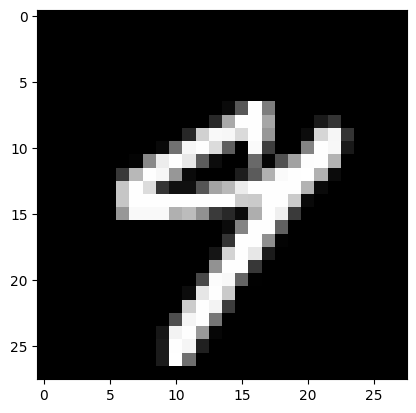

Prediction:  [6]
Label:  6


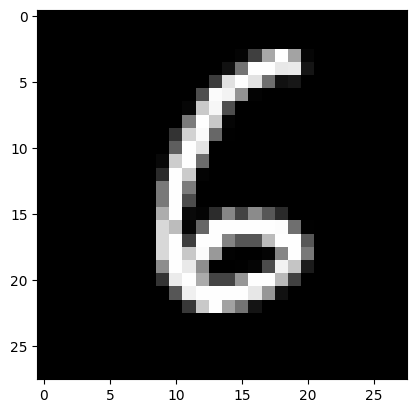

Prediction:  [9]
Label:  4


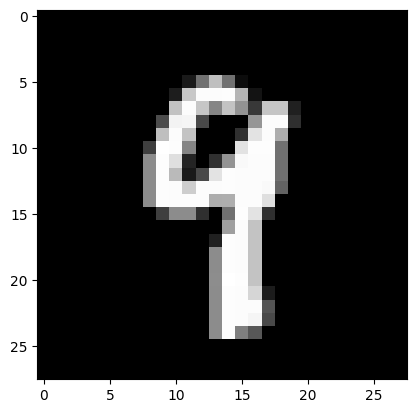

In [196]:
test_prediction(133, W1, b1, W2, b2)
test_prediction(168, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)

## Accuracy For Test Data

In [178]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
acc = get_accuracy(dev_predictions, Y_dev)
print("Accuracy on test data is:" ,acc)

[4 1 3 4 8 2 7 8 6 8 6 9 3 4 1 3 3 1 3 0 3 0 5 7 1 2 2 1 0 1 3 5 1 2 2 6 9
 6 7 3 3 2 0 1 6 0 6 1 3 8 6 0 2 9 4 8 1 8 1 7 3 2 0 8 3 3 7 2 2 7 6 1 3 0
 2 4 8 7 6 7 3 0 1 0 1 9 8 0 0 8 1 6 0 7 8 2 2 7 5 5 7 2 0 0 7 5 5 2 6 5 3
 7 6 3 1 2 3 4 6 1 4 2 6 0 3 9 9 8 8 4 4 5 4 3 6 0 1 4 4 8 0 3 8 7 4 0 5 0
 5 3 2 6 2 3 0 5 8 8 4 6 1 9 3 9 6 1 0 0 6 6 7 6 0 8 9 2 8 2 0 8 0 0 1 4 4
 8 0 4 7 5 9 2 5 0 0 3 0 9 2 0 8 7 6 7 2 5 6 5 9 1 9 1 3 1 8 6 4 4 4 4 1 2
 1 4 3 6 0 3 5 1 5 3 1 2 0 3 2 8 4 9 3 5 2 3 7 4 6 8 0 0 5 5 1 0 8 5 4 2 0
 3 1 9 2 5 8 6 6 5 8 8 5 7 4 3 4 5 2 6 7 2 8 0 9 2 4 1 2 9 0 9 2 4 7 3 3 8
 7 6 7 4 9 7 9 0 7 8 8 9 3 0 1 1 9 6 6 8 2 2 0 0 6 5 2 5 2 4 5 9 7 9 4 9 0
 7 9 3 9 7 1 5 3 9 7 6 9 0 8 8 3 1 5 9 4 6 3 3 8 8 2 9 7 6 1 9 5 3 9 0 8 8
 9 1 2 8 6 3 2 5 1 0 1 6 0 3 2 8 2 0 4 3 2 9 1 1 9 2 5 1 7 8 1 4 3 1 5 4 4
 7 4 5 2 1 3 1 0 7 1 2 8 1 5 3 9 4 8 8 4 2 9 5 1 1 3 6 2 8 9 3 2 1 5 4 7 3
 9 6 2 7 5 7 0 6 2 1 9 9 3 6 5 7 4 2 0 0 0 6 5 6 0 4 5 5 4 3 6 5 6 8 8 7 0
 4 0 4 4 7 3 8 4 8 4 2 1 